In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [ ]:
data = pd.read_csv("my_ap_dataset.csv",sep=';')
data

,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,PM10
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,73
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,71
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,70
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,70
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,69
...,...,...,...,...,...,...,...,...,...,...,...
155400,12/31/2022 19:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.030,3.5,0.1100,59,99
155401,12/31/2022 20:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.030,3.5,0.1000,61,101
155402,12/31/2022 21:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.028,3.5,0.1000,62,100
155403,12/31/2022 22:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.042,3.6,0.0525,65,106


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155405 entries, 0 to 155404
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          155405 non-null  object 
 1   Station code  155405 non-null  int64  
 2   Address       155405 non-null  object 
 3   Latitude      155405 non-null  float64
 4   Longitude     155405 non-null  float64
 5   SO2           155405 non-null  float64
 6   NO2           155405 non-null  float64
 7   CO            155405 non-null  float64
 8   O3            155405 non-null  float64
 9   PM2.5         155405 non-null  int64  
 10  PM10          155405 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 13.0+ MB


In [19]:
# 2. Handling missing values (imputasi jika ada kolom null)
imputer = SimpleImputer(strategy="most_frequent")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [20]:
data

,date,Station code,Address,Latitude,Longitude,SO2,NO2,CO,O3,PM2.5,PM10
0,1/1/2017 0:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.059,1.2,0.0525,57,73
1,1/1/2017 1:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.058,1.2,0.0525,59,71
2,1/1/2017 2:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,59,70
3,1/1/2017 3:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.04,0.056,1.2,0.0525,58,70
4,1/1/2017 4:00,101,"Kuril Bishow Road, Dhaka, Bangladesh",23.820612,90.421011,0.03,0.051,1.2,0.0525,61,69
...,...,...,...,...,...,...,...,...,...,...,...
155400,12/31/2022 19:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.03,3.5,0.11,59,99
155401,12/31/2022 20:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.03,3.5,0.1,61,101
155402,12/31/2022 21:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.028,3.5,0.1,62,100
155403,12/31/2022 22:00,103,"Tongi, Gazipur, Bangladesh",23.894144,90.404219,0.02,0.042,3.6,0.0525,65,106


In [21]:
# 3. Drop kolom ID
data = data.drop(columns=["date","Station code","Address","Latitude","Longitude"])
data

,SO2,NO2,CO,O3,PM2.5,PM10
0,0.04,0.059,1.2,0.0525,57,73
1,0.04,0.058,1.2,0.0525,59,71
2,0.04,0.056,1.2,0.0525,59,70
3,0.04,0.056,1.2,0.0525,58,70
4,0.03,0.051,1.2,0.0525,61,69
...,...,...,...,...,...,...
155400,0.02,0.03,3.5,0.11,59,99
155401,0.02,0.03,3.5,0.1,61,101
155402,0.02,0.028,3.5,0.1,62,100
155403,0.02,0.042,3.6,0.0525,65,106


In [22]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data_scaled = st.fit_transform(data)
data_scaled

array([[-0.02814874, -0.21098735, -3.42365676, -1.04500604, -0.23439755,
        -0.56979338],
       [-0.02814874, -0.23017811, -3.42365676, -1.04500604, -0.10068901,
        -0.64286916],
       [-0.02814874, -0.26855964, -3.42365676, -1.04500604, -0.10068901,
        -0.67940706],
       ...,
       [-0.64413903, -0.80590094,  0.28931066, -0.79669908,  0.09987379,
         0.4167297 ],
       [-0.64413903, -0.53723029,  0.45074402, -1.04500604,  0.3004366 ,
         0.63595705],
       [-0.64413903, -0.63318409,  0.28931066, -1.11034998,  0.23358233,
         0.56288126]])

In [10]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 6. Tentukan jumlah cluster optimal (Silhouette Score)
for k in tqdm(range(2, 11), desc="Mencari cluster optimal"):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data)
    score = silhouette_score(data, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")


Mencari cluster optimal:  11%|█         | 1/9 [02:58<23:50, 178.83s/it]

k=2, Silhouette Score=0.4404


Mencari cluster optimal:  22%|██▏       | 2/9 [05:56<20:48, 178.37s/it]

k=3, Silhouette Score=0.2368


Mencari cluster optimal:  33%|███▎      | 3/9 [08:51<17:39, 176.55s/it]

k=4, Silhouette Score=0.3059


Mencari cluster optimal:  44%|████▍     | 4/9 [11:41<14:30, 174.00s/it]

k=5, Silhouette Score=0.3094


Mencari cluster optimal:  56%|█████▌    | 5/9 [14:35<11:36, 174.16s/it]

k=6, Silhouette Score=0.3110


Mencari cluster optimal:  67%|██████▋   | 6/9 [17:26<08:39, 173.04s/it]

k=7, Silhouette Score=0.2881


Mencari cluster optimal:  78%|███████▊  | 7/9 [20:15<05:43, 171.77s/it]

k=8, Silhouette Score=0.3150


Mencari cluster optimal:  89%|████████▉ | 8/9 [23:03<02:50, 170.46s/it]

k=9, Silhouette Score=0.3090


Mencari cluster optimal: 100%|██████████| 9/9 [25:51<00:00, 172.39s/it]

k=10, Silhouette Score=0.2947


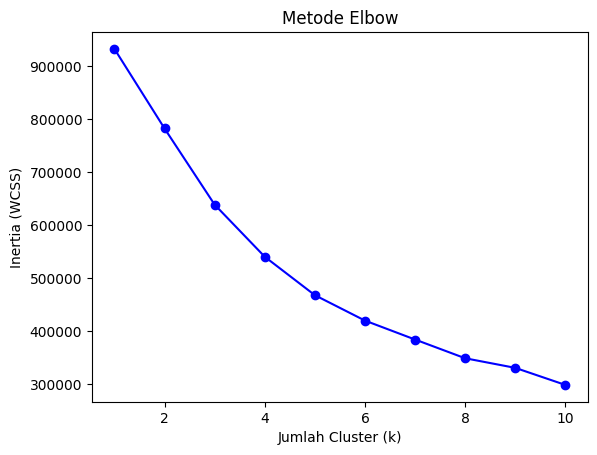

In [28]:
# 6. Visualisasi Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Metode Elbow')
plt.show()


In [29]:
# 8. Fit model KMeans dengan k yang dipilih (misal k=6)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
data["Cluster"] = kmeans.labels_

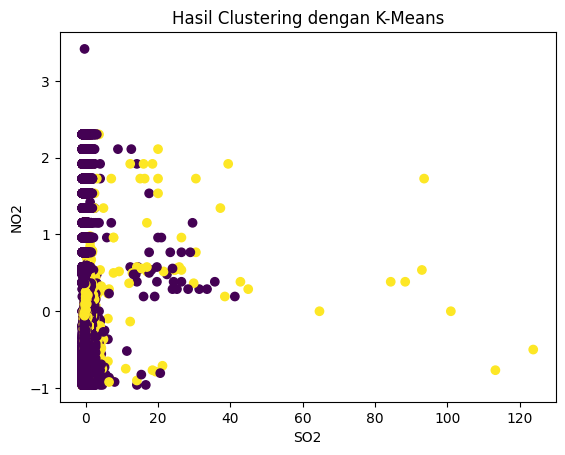

In [32]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], 
            c=kmeans.labels_, cmap='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()


In [33]:
data['Cluster'].value_counts()

Cluster
0    143425
1     11980
Name: count, dtype: int64

In [34]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Fitur (X) dan Target (y)
X = data_scaled  # semua fitur numerik hasil preprocessing
y = data["Cluster"]  # label cluster

# 2. Split data (train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Prediksi
y_pred = rf.predict(X_test)

# 5. Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[28684     1]
 [    4  2392]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28685
           1       1.00      1.00      1.00      2396

    accuracy                           1.00     31081
   macro avg       1.00      1.00      1.00     31081
weighted avg       1.00      1.00      1.00     31081

